In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras import optimizers
from keras import utils
from keras.optimizers import Adam

In [40]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [41]:
num_classes = 10
classes = { 0:"airplane(літак)",
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

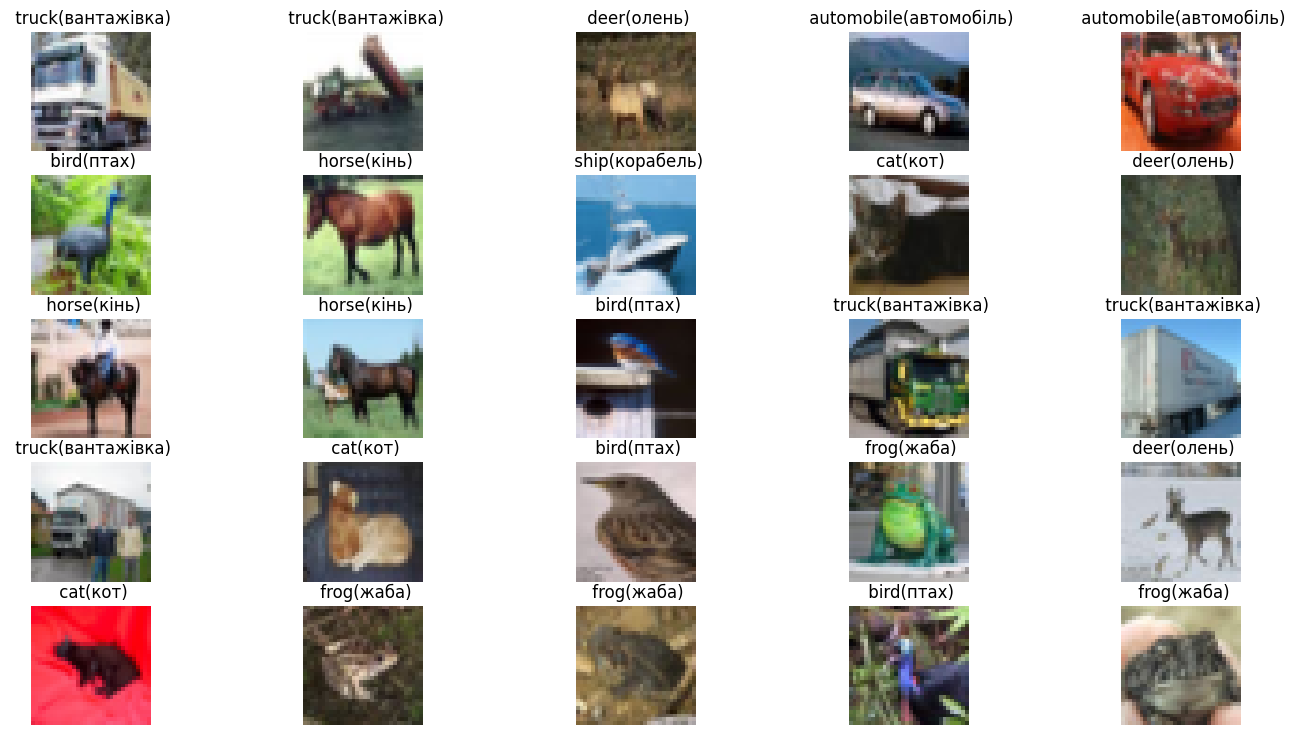

In [42]:

plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")


In [43]:
# Преобразование размерности изображений

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Преобразуем метки в категории


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 10), y_test: (10000, 10)


In [44]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False


In [45]:
model = models.Sequential([
                          #  layers.Input(original_dim),
                          #  layers.Lambda(lambda image: tf.image.resize(image, target_size)),
                           conv_base,

                           layers.Flatten(),

                           layers.Dropout(0.2),
                           layers.Dense(512, activation="relu", kernel_initializer="he_uniform"),

                          #  layers.Dropout(0.3),
                           layers.Dense(256, activation="relu"),
                           # layers.Dropout(0.3),

                           layers.Dense(10, activation="softmax"), ])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15111242 (57.64 MB)
Trainable params: 39

In [47]:
model.compile(  loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [53]:
# history = model.fit(train_generator,
#                     epochs=10,
#                     steps_per_epoch=150,
#                     validation_data=validation_generator,
#                     validation_steps=64,
#                     batch_size=64,
#                     validation_split=0.2 ,
#                     shuffle=True)
history = model.fit(x_train, y_train,
                    epochs=3,
                    steps_per_epoch=150,
                    validation_steps=64,
                    batch_size=32,
                    # validation_split=0.2 ,
                    shuffle=True)

Epoch 1/3
150/150 [==============================] - 60s 401ms/step - loss: 1.5568 - accuracy: 0.4492
Epoch 2/3
150/150 [==============================] - 60s 401ms/step - loss: 1.5129 - accuracy: 0.4577
Epoch 3/3
150/150 [==============================] - 110s 737ms/step - loss: 1.5090 - accuracy: 0.4644


In [54]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

313/313 [==============================] - 121s 387ms/step - loss: 1.4060 - accuracy: 0.5087
Відсоток точності тестових даних:  50.87


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


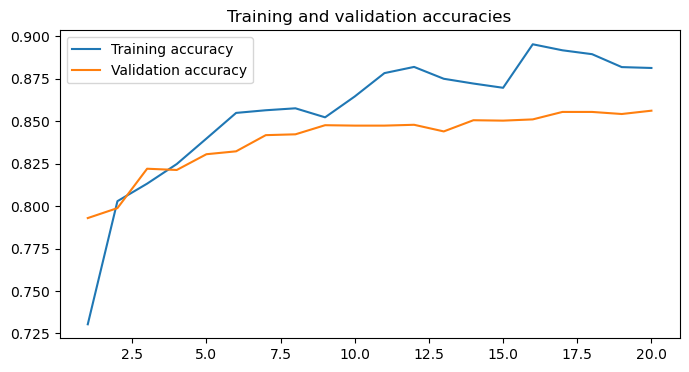

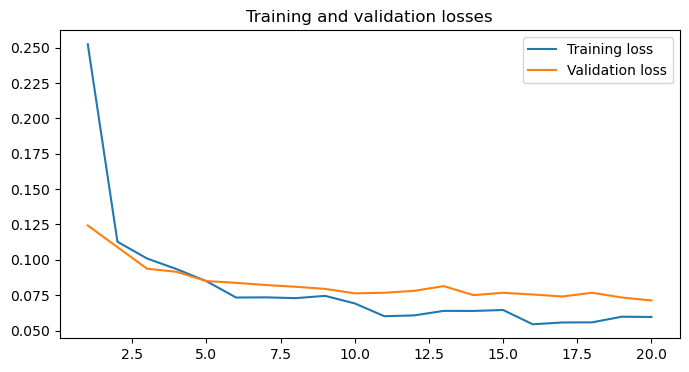

In [ ]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"],  label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")
plt.title("Training and validation losses")
plt.legend()
plt.show()

In [56]:
model.save("vgg16_basesd_model_2.hdf5")

In [ ]:
# model = models.load_model("models/vgg16_basesd_model_3.hdf5")

Донавчання

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])


In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["acc"]
)

history = model.fit(
    x_train,y_train,
    steps_per_epoch=150,
    epochs=10,
     verbose=1, batch_size=64, validation_split=0.2
)
# history_modified = model.fit( x_train, y_train, epochs=5, verbose=1, batch_size=64, validation_split=0.2 )

Epoch 1/10
150/150 [==============================] - 14s 89ms/step - loss: 0.2944 - acc: 0.7168 - val_loss: 0.1386 - val_acc: 0.7832
Epoch 2/10
150/150 [==============================] - 13s 88ms/step - loss: 0.1221 - acc: 0.7967 - val_loss: 0.1132 - val_acc: 0.8040
Epoch 3/10
150/150 [==============================] - 13s 88ms/step - loss: 0.1009 - acc: 0.8152 - val_loss: 0.1040 - val_acc: 0.8146
Epoch 4/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0941 - acc: 0.8249 - val_loss: 0.0943 - val_acc: 0.8251
Epoch 5/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0864 - acc: 0.8344 - val_loss: 0.0865 - val_acc: 0.8329
Epoch 6/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0717 - acc: 0.8624 - val_loss: 0.0840 - val_acc: 0.8407
Epoch 7/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0728 - acc: 0.8594 - val_loss: 0.0840 - val_acc: 0.8352
Epoch 8/10
150/150 [==============================] - 13s 88ms

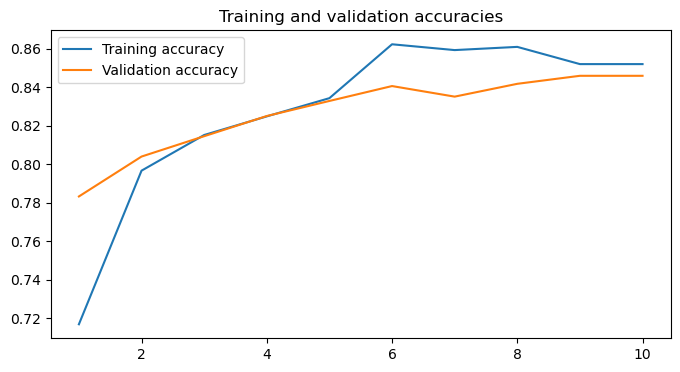

In [ ]:
epochs = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["acc"],   label="Training accuracy")
plt.plot(epochs, history.history["val_acc"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.show()

In [ ]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))


313/313 [==============================] - 9s 29ms/step - loss: 0.0808 - acc: 0.8415
Відсоток точності тестових даних:  84.15
